#  King County House Price Prediction

# Example Assignment 1


You are assuming that the assignment is predict house sale prices for King County, which includes Seattle from  King County House Price prediction [https://www.kaggle.com/harlfoxem/housesalesprediction/home](https://www.kaggle.com/harlfoxem/housesalesprediction/home)

In this assignment you are going to clean up a poorly formatted assignment.  An assignment must have an abstract. There needs to be explanations in the code of what is going on. This code has very sparse explanations. Expect to explain the code more clearly.

 An assignment must have:
 
 * an abstract   
 * explainations of the analysis and interpretaions of figures and graphs    
 * a conclusion      
 * contributions statement  
 * citations  
 * a license 
 
 
**Abstract**  
In abstracts, you must get the essence of what your report is about, usually in about 200 words.  
 * Aim or purpose of research  
 * Method used  
 * Findings/results   
 * Conclusion 
 
**Conclusions** 

Summarize your results in a few sentences and use this summary to support your conclusion. State whether your results support or contradict your hypothesis. 


If you are comparing many models create a table that orders the models and their evaluation and hyperparameters.


**Contributions statement**
Must explain what was done by you and estimate a percentage of the code written by you.  Assume everything given to you was not written by you and focus on the additional code that you add for your contributions statement. 


**Citations**
You must cite any code used.

Add your additional citations to:
* Random forest Classifer : https://www.datacamp.com/community/tutorials/random-forests-classifier-python
* Random Forest Regression : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74
* XGBoost Classifier & XGBoost Regression : 
    * https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
    * https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/
* Logistic Regression : http://www.michaeljgrogan.com/statsmodels-sklearn-linear-regression/ 

**License **

Must have a license such as the MIT License. [https://opensource.org/licenses/MIT](https://opensource.org/licenses/MIT)

**Clean Up Logical Errors**

You must clean up logical errors in the code.  

For example, if a line like the below is suppossed to represent the best hyper-parameters

__best_model = XGBClassifier(max_depth=3, n_estimators=150)__

should actually be

__best_model = XGBClassifier(max_depth=6, n_estimators=250)__


you should rewrite the code so that it is not possible to pass non-optimal parameters.  

# Abstract

In abstracts, you must get the essence of what your report is about, usually in about 200 words.  
 * Aim or purpose of research  
 * Method used  
 * Findings/results   
 * Conclusion   



## Approach

Algorithms used.

* For Part A:
    * Bagging Algo : Random Forest Classifier
    * Boosting Algo : XGBoost Classifier
* For Part B:
    * Logistic Regression
* For Part C:
    * Bagging Algo : Random Forest Regressor
    * Boosting Algo : XGBoost Regressor
 
    
You need at add another supervised algorithm and tune at least one hyperparameter for that algorithm.       


## Dataset
* King County House Price prediction [https://www.kaggle.com/harlfoxem/housesalesprediction/home](https://www.kaggle.com/harlfoxem/housesalesprediction/home)  This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.  
* In order to perform classification tasks, I have converted the price quantitative variable to a binary classification variable with HIGH price as 1 and LOW price as -1(For logistic regression I am taking LOW as 0)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series
%matplotlib inline

In [2]:
features = pd.read_csv('king_county_cleansed.csv')

In [3]:
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0


In [4]:
features.describe()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#10,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040
count,21613.00000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,0.007542,1788.390691,291.509045,1971.005136,...,0.052468,0.018461,0.004164,0.000601,0.014667,0.004858,0.005043,0.012446,0.002313,0.013048
std,6239.28002,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.086517,828.090978,442.575043,29.373411,...,0.222975,0.134615,0.064397,0.024518,0.120219,0.069533,0.070838,0.110869,0.048043,0.113482
min,0.00000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,0.000000,290.000000,0.000000,1900.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5403.00000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,0.000000,1190.000000,0.000000,1951.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10806.00000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,0.000000,1560.000000,0.000000,1975.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16209.00000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,0.000000,2210.000000,560.000000,1997.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,21612.00000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,1.000000,9410.000000,4820.000000,2015.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


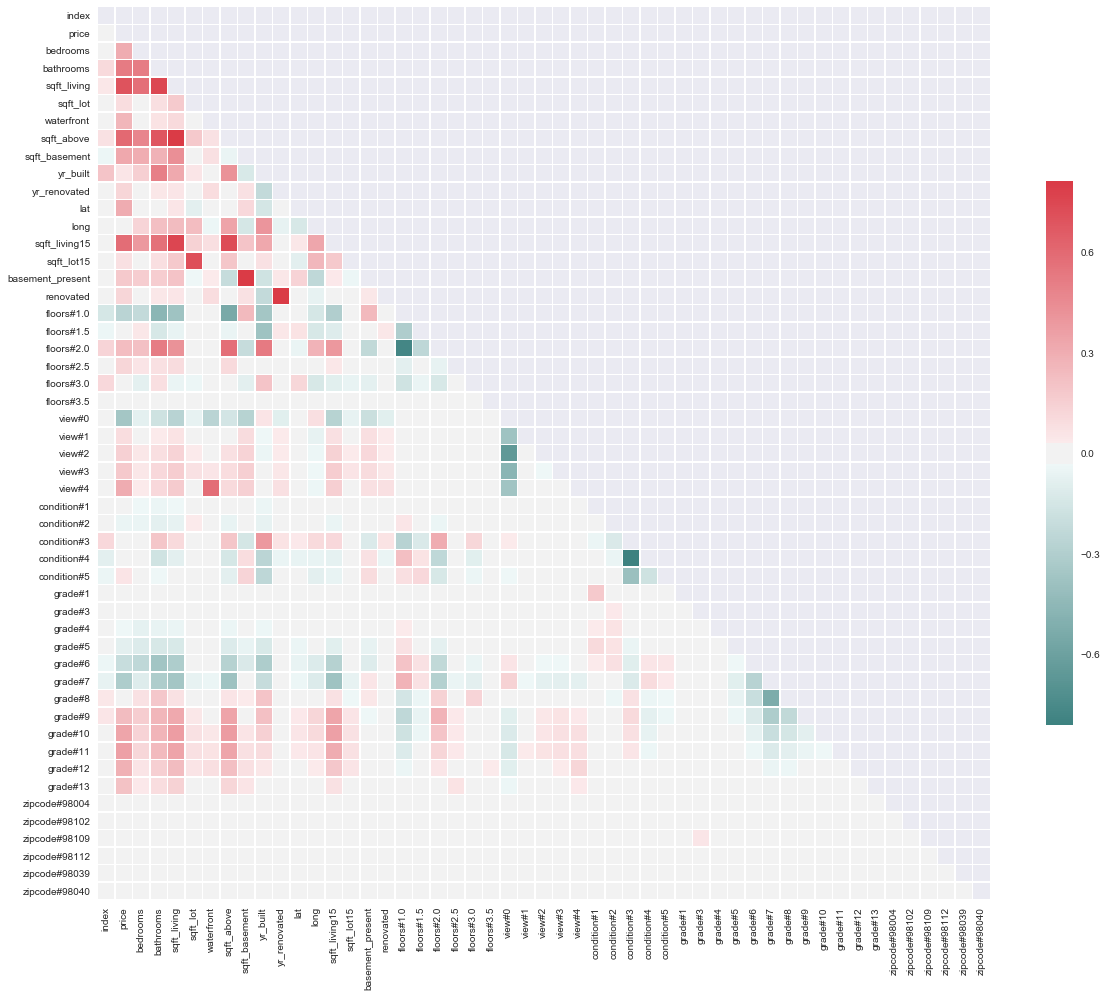

In [5]:
corr = features.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(190, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

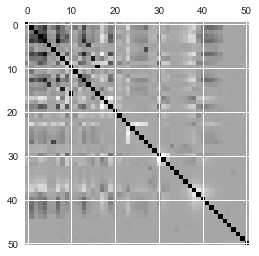

In [6]:
plt.matshow(features.corr())

In [7]:
median_price = features.loc[:,"price"].median()
print(median_price)

450000.0


Adding column to dataframe for holding categorical price value : HIGH/LOW

All values < median are LOW and Values >= median are HIGH

In [8]:
features['price_cat'] = features['price'].apply(lambda x: 1 if x > median_price else -1)

In [9]:
features[['price','price_cat']].head(10)

,price,price_cat
0,437500,-1
1,790000,1
2,675000,1
3,555000,1
4,440000,-1
5,295000,-1
6,470000,1
7,550000,1
8,313000,-1
9,626000,1


In [10]:
features.head(5)

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade#11,grade#12,grade#13,zipcode#98004,zipcode#98102,zipcode#98109,zipcode#98112,zipcode#98039,zipcode#98040,price_cat
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,-1
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,1
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,1
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,1
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,-1


## Part A

    * Bagging Algo : Random Forest Classifier
    * Boosting Algo : XGBoost Classifier
    
Compare at least one bagging based tree algorithm (e.g. Random Forest) with a boosting based tree algorithm on a classification problem.

* Which hyper-parameters are important?
* What hyper-parameter values work best?
* Which supervised learner works best on the test data?

## Random Forest Classifier


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat'],
      dtype='object')

In [13]:
X_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y=features['price_cat']  # Labels
       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [14]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


In [15]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


In [16]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [17]:
feature_imp = pd.Series(clf.feature_importances_,index=X_features).sort_values(ascending=False)
feature_imp

lat                 2.788292e-01
sqft_living         1.344183e-01
sqft_living15       8.714934e-02
sqft_above          7.490917e-02
long                5.573858e-02
sqft_lot15          5.328125e-02
sqft_lot            4.880355e-02
yr_built            4.764638e-02
bathrooms           3.606762e-02
sqft_basement       2.366234e-02
grade#7             2.279572e-02
bedrooms            1.668648e-02
grade#9             1.611226e-02
grade#8             1.432017e-02
grade#6             1.178011e-02
view#0              1.128215e-02
floors#1.0          1.044881e-02
basement_present    8.730148e-03
floors#2.0          6.231788e-03
condition#3         5.562632e-03
grade#10            5.227652e-03
condition#4         4.232433e-03
floors#1.5          3.843423e-03
yr_renovated        2.998096e-03
condition#5         2.785064e-03
view#2              2.208156e-03
renovated           1.716123e-03
zipcode#98004       1.545165e-03
floors#3.0          1.188307e-03
view#3              1.154706e-03
zipcode#98

In [18]:
top_features = feature_imp.head(10)
top_features

lat              0.278829
sqft_living      0.134418
sqft_living15    0.087149
sqft_above       0.074909
long             0.055739
sqft_lot15       0.053281
sqft_lot         0.048804
yr_built         0.047646
bathrooms        0.036068
sqft_basement    0.023662
dtype: float64

No handles with labels found to put in legend.


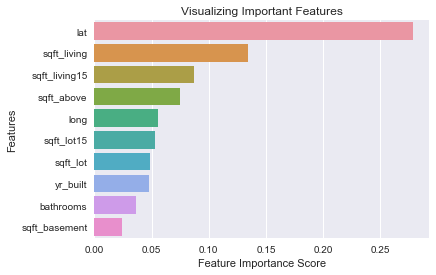

In [19]:
# Creating a bar plot
sns.barplot(x=top_features, y=top_features.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [20]:
from pprint import pprint

In [21]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


According to the documentation, the most important settings are the number of trees in the forest (n_estimators) and the number of features considered for splitting at each leaf node (max_features)

We will try adjusting the following set of hyperparameters:



### Finding important hyper-parameters

The important parameters for a Random Forest Classfier are as follows:



### We will use RandomSearchCV and GridSearchCV to find the best values for the same

In [22]:
from sklearn.model_selection import RandomizedSearchCV

In [23]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [24]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf_base = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = RandomizedSearchCV(estimator = clf_base, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6 
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, total=   0.5s
[CV] n_estimators=152, min_samples_split=5, min_samples_le

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.6s


[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   3.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   3.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.3s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, total=   1.1s
[CV]  n_estimators=57, min_samples_split=10, min_s

[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   0.2s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.2s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.2s
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.2s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=2 
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=aut

[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.1s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   2.0s
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.9s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.9s
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=10, min_samples_split=10, min_sampl

[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.3s


[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.1s
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, total=   3.4s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, total=   3.3s
[CV] n_estimators=152, min_samples_split=5,

[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=8, total=   1.0s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=6, total=   0.8s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.2s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.1s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_fe

[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.7s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   1.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   1.5s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   1.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.6s
[CV] n_estimators=200, min_samples_split=10, min_samples_

[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=2, total=   1.3s
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, total=   1.2s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, total=   1.2s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, total=   1.3s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_feat

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [25]:
clf_random.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 105}

### Evaluate Random Search

In [26]:
## Common Classification algorithm evaluator. It returns the roc_auc
from sklearn.metrics import roc_curve, auc
def evaluate(model, X_train,y_train, X_test, y_test):
    model.fit(X_train,y_train)
    predictions = model.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #print(roc)
    return roc_auc

In [27]:
base_model = RandomForestClassifier(n_estimators = 5, random_state = 42)

In [28]:
best_random = clf_random.best_estimator_

In [29]:
print('ROC for base model : ' + str(evaluate(base_model,X_train,y_train, X_test, y_test)))
print('ROC for best model : ' + str(evaluate(best_random,X_train,y_train, X_test, y_test)))

ROC for base model : 0.88606931622
ROC for best model : 0.901751054674


### Grid Search with Cross Validation

In [30]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 2000]
}
# Create a based model
clf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [31]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2000 
[CV] bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=100, total=   2.2s
[CV]  bootstrap=True, max_featu

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   55.3s


[CV]  bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=  44.5s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=2000, total=  44.2s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   4.2s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   4.2s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   4.2s
[CV] bootstrap=True, max_feat

[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=5, n_estimators=2000 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=2000, total=  45.2s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100, total=   2.2s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100, total=   2.5s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=100 
[CV]  bootstrap=True, max_features=auto, min_samples_leaf=2, min_samples_split=7, n_estimators=2000, total=  44.6s
[CV] bootstrap=True, max_features=auto, min_samples_leaf=3, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_features=auto, min_s

[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed:  3.6min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [3, 5, 7], 'n_estimators': [100, 200, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=2)

In [32]:
grid_search.best_params_

{'bootstrap': True,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 100}

In [33]:
best_grid = grid_search.best_estimator_

In [34]:
print('ROC for best grid search model : ' + str(evaluate(best_grid,X_train,y_train, X_test, y_test)))

ROC for best grid search model : 0.903271398441


### Now lets implement XGBoost (eXtreme Gradient Boosting) 

I’ll consider only tree booster here because it always outperforms the linear booster and thus the later is rarely used.

In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

/Users/bear/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [36]:
# fit model on training data
xgBoostClassifierModel = XGBClassifier()
xgBoostClassifierModel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [37]:
# make predictions for test data
y_pred = xgBoostClassifierModel.predict(X_test)
predictions = [round(value) for value in y_pred]

In [38]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.48%


## Which are the important hyper parameters?

* ???
* ???
* ??? 

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

Best: -0.210598 using {'n_estimators': 350}
-0.256521 (0.010445) with: {'n_estimators': 50}
-0.230593 (0.011526) with: {'n_estimators': 100}
-0.221281 (0.012066) with: {'n_estimators': 150}
-0.216314 (0.012628) with: {'n_estimators': 200}
-0.213511 (0.012680) with: {'n_estimators': 250}
-0.211842 (0.012444) with: {'n_estimators': 300}
-0.210598 (0.012785) with: {'n_estimators': 350}


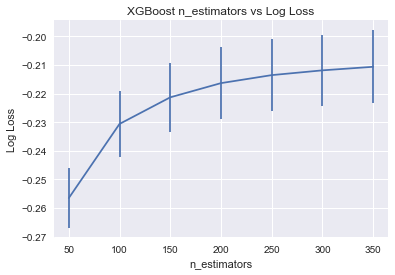

In [40]:
model = XGBClassifier()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators.png')

We can see that the cross validation log loss scores are negative. This is because the scikit-learn cross validation framework inverted them. The reason is that internally, the framework requires that all metrics that are being optimized are to be maximized, whereas log loss is a minimization metric. It can easily be made maximizing by inverting the scores.

The best number of trees was n_estimators=350 resulting in a log loss of -0.213537, but really not a significant difference from n_estimators=200. In fact, there is not a large relative difference in the number of trees between 100 and 350 if we plot the results.

## Tune the Size of Decision Trees in XGBoost

In gradient boosting, we can control the size of decision trees, also called the number of layers or the depth.

Shallow trees are expected to have poor performance because they capture few details of the problem and are generally referred to as weak learners. Deeper trees generally capture too many details of the problem and overfit the training dataset, limiting the ability to make good predictions on new data.

Generally, boosting algorithms are configured with weak learners, decision trees with few layers, sometimes as simple as just a root node, also called a decision stump rather than a decision tree.

The maximum depth can be specified in the XGBClassifier and XGBRegressor wrapper classes for XGBoost in the max_depth parameter. This parameter takes an integer value and defaults to a value of 3.

In [41]:
model = XGBClassifier()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   32.7s finished


Best: -0.206851 using {'max_depth': 7}
-0.331726 (0.009596) with: {'max_depth': 1}
-0.230593 (0.011526) with: {'max_depth': 3}
-0.212634 (0.012654) with: {'max_depth': 5}
-0.206851 (0.013448) with: {'max_depth': 7}
-0.208659 (0.012861) with: {'max_depth': 9}


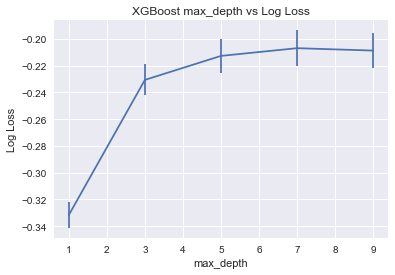

In [42]:
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
plt.savefig('max_depth.png')

Reviewing the plot of log loss scores, we can see a marked jump from max_depth=1 to max_depth=3 then pretty even performance for the rest the values of max_depth.

Although the best score was observed for max_depth=5, it is interesting to note that there was practically little difference between using max_depth=3 or max_depth=7.

This suggests a point of diminishing returns in max_depth on a problem that you can tease out using grid search. A graph of max_depth values is plotted against (inverted) logarithmic loss below.

### Tune The Number of Trees and Max Depth in XGBoost

There is a relationship between the number of trees in the model and the depth of each tree.

We would expect that deeper trees would result in fewer trees being required in the model, and the inverse where simpler trees (such as decision stumps) require many more trees to achieve similar results.

We can investigate this relationship by evaluating a grid of n_estimators and max_depth configuration values. To avoid the evaluation taking too long, we will limit the total number of configuration values evaluated. Parameters were chosen to tease out the relationship rather than optimize the model.

We will create a grid of 4 different n_estimators values (350, 300, 250, 400) and 4 different max_depth values (6, 7, 8, 9) and each combination will be evaluated using 10-fold cross validation. A total of 4*4*10 or 160 models will be trained and evaluated.



In [43]:
# grid search
model = XGBClassifier()
n_estimators = [350, 300, 250, 400]
max_depth = [6, 7, 8, 9]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


[6, 7, 8, 9]
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:  7.4min finished


Best: -0.206594 using {'max_depth': 6, 'n_estimators': 250}
-0.210369 (0.017360) with: {'max_depth': 6, 'n_estimators': 350}
-0.208358 (0.016907) with: {'max_depth': 6, 'n_estimators': 300}
-0.206594 (0.016028) with: {'max_depth': 6, 'n_estimators': 250}
-0.212370 (0.017970) with: {'max_depth': 6, 'n_estimators': 400}
-0.215489 (0.015698) with: {'max_depth': 7, 'n_estimators': 350}
-0.212513 (0.014956) with: {'max_depth': 7, 'n_estimators': 300}
-0.209843 (0.014491) with: {'max_depth': 7, 'n_estimators': 250}
-0.218934 (0.016089) with: {'max_depth': 7, 'n_estimators': 400}
-0.223642 (0.016684) with: {'max_depth': 8, 'n_estimators': 350}
-0.219297 (0.016335) with: {'max_depth': 8, 'n_estimators': 300}
-0.215353 (0.015558) with: {'max_depth': 8, 'n_estimators': 250}
-0.228244 (0.017581) with: {'max_depth': 8, 'n_estimators': 400}
-0.232503 (0.016736) with: {'max_depth': 9, 'n_estimators': 350}
-0.226739 (0.015552) with: {'max_depth': 9, 'n_estimators': 300}
-0.221105 (0.014920) with: {'m

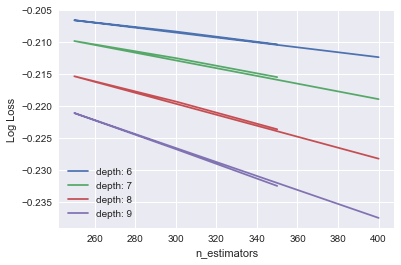

In [44]:
# plot results
scores = np.array(means).reshape(len(max_depth), len(n_estimators))
for i, value in enumerate(max_depth):
    plt.plot(n_estimators, scores[i], label='depth: ' + str(value))
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
plt.savefig('n_estimators_vs_max_depth.png')

We can see that the best result was achieved with a n_estimators=250 and max_depth=6, similar to the best values found from the previous two rounds of standalone parameter tuning (n_estimators=250, max_depth=5).

We can plot the relationship between each series of max_depth values for a given n_estimators.

Fewer boosted trees are required with increased tree depth.

Further, we would expect the increase complexity provided by deeper individual trees to result in greater overfitting of the training data which would be exacerbated by having more trees, in turn resulting in a lower cross validation score. We don’t see this here as our trees are not that deep nor do we have too many. Exploring this expectation  is left as an exercise you could explore yourself.

## Creating the model with the best values for Hyper parameters


In [45]:
model = XGBClassifier(max_depth=3, n_estimators=50)

In [46]:
print(model)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=50, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)


In [47]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [48]:
print('ROC for the XGBoost model is: ' + str(evaluate(model, X_train,y_train, X_test, y_test)))

ROC for the XGBoost model is: 0.897685069908


## Thus we got a higher ROC for XGBoost model than the bagging models tried earlier

## Classification with Logistic Regression

Compare logistic regression with the based tree algorithms in Part A on the same data. Answer the following questions for logistic regression:

* Which independent variables are important?
* Is there multi-colinearity?
* How does it compare to the the models in Part A?

We need to develop a Nominal Logistic Regression model which will predict whether the house price is HIGH(1) or LOW(-1)

In [49]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.linear_model import LogisticRegression

/Users/bear/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [50]:
features['price_cat_log'] = features['price'].apply(lambda x: 1 if x > median_price else 0)

In [51]:
features.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040', 'price_cat',
       'price_cat_log'],
      dtype='object')

In [52]:
price_cat_log=features['price_cat_log']
y_log=price_cat_log

In [53]:
X_train_log,X_test_log,y_train_log,y_test_log=train_test_split(features[['bedrooms', 'sqft_living', 'waterfront', 'sqft_basement', 'yr_built', 'bathrooms']]
                                                               ,y_log,test_size=0.3,random_state=0)

In [54]:
logreg=LogisticRegression().fit(X_train_log,y_train_log)
logreg
print("Training set score: {:.3f}".format(logreg.score(X_train_log,y_train_log)))
print("Test set score: {:.3f}".format(logreg.score(X_test_log,y_test_log)))

Training set score: 0.732
Test set score: 0.731


In [55]:
logit_model=sm.Logit(y_train_log,X_train_log)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.522835
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:          price_cat_log   No. Observations:                15129
Model:                          Logit   Df Residuals:                    15123
Method:                           MLE   Df Model:                            5
Date:                Mon, 14 Jan 2019   Pseudo R-squ.:                  0.2457
Time:                        19:42:05   Log-Likelihood:                -7910.0
converged:                       True   LL-Null:                       -10486.
                                        LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
bedrooms         -0.3118      0.028    -10.959      0.000      -0.368      -0.256
sqft_living       0.

### Looking at the z scores, we know that, sqft_living is the most significant followed by yr_built and then the rest.

Why?  Explain.

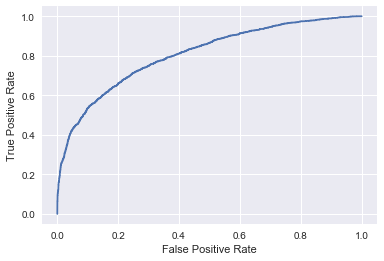

In [56]:
from sklearn.metrics import roc_curve
falsepos,truepos,thresholds=roc_curve(y_test_log,logreg.decision_function(X_test_log))

plt.plot(falsepos,truepos,label="ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

cutoff=np.argmin(np.abs(thresholds))
plt.plot(falsepos[cutoff],truepos[cutoff],'o',markersize=10,label="cutoff",fillstyle="none")
plt.show()

In [57]:
from sklearn import metrics
metrics.auc(falsepos, truepos)

0.80786951781479166

## As compared to Models in Part A, the accuracy of the Logistic Regression model is less. 

## Regression with Trees 
Compare at least one bagging based tree algorithm (e.g. Random Forest) with a boosting based tree algorithm on a regression problem.
Answer the following questions for each supervised learner:

* Which hyper-parameters are important?    
* What hyper-parameter values work best?   
* Which supervised learner works best on the test data?  


### Random Forest based Regression

To look at the available hyperparameters, we can create a random forest and examine the default values.

In [58]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_split': 1e-07,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': 1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


* estimators = number of trees in the foreset
* max_features = max number of features considered for splitting a node
* max_depth = max number of levels in each decision tree
* min_samples_split = min number of data points placed in a node before the node is split
* min_samples_leaf = min number of data points allowed in a leaf node
* bootstrap = method for sampling data points (with or without replacement)

In [59]:
X_features_reg = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']

X_reg=features[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors#1.0', 'floors#1.5', 'floors#2.0', 'floors#2.5',
       'floors#3.0', 'floors#3.5', 'view#0', 'view#1', 'view#2', 'view#3',
       'view#4', 'condition#1', 'condition#2', 'condition#3', 'condition#4',
       'condition#5', 'grade#1', 'grade#3', 'grade#4', 'grade#5', 'grade#6',
       'grade#7', 'grade#8', 'grade#9', 'grade#10', 'grade#11', 'grade#12',
       'grade#13', 'zipcode#98004', 'zipcode#98102', 'zipcode#98109',
       'zipcode#98112', 'zipcode#98039', 'zipcode#98040']]  # Features

y_reg=features['price']  # Labels
       
# Split dataset into training set and test set
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=0.3) # 70% training and 30% test

### Random Search Cross Validation in Scikit-Learn

To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

In [60]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4]
# Method of selecting samples for training each tree
#bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [2, 4, 6, 8, 10, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [2, 4],
 'min_samples_split': [5, 10],
 'n_estimators': [10, 57, 105, 152, 200]}


In [61]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_reg, y_train_reg)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2 
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6 
[CV] n_estimators=152, min_samples_split=5, min_samples_leaf=4, max_features=auto, max_depth=6 
[CV]  n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=2, total=   0.8s
[CV] n_estimators=152, min_samples_split=5, min_samples_le

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.9s


[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=2, total=   3.7s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=4, total=   0.4s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.1s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=6 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.0s
[CV] n_estimators=200, min_samples_split=5, min_sample

[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, total=  13.1s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=8, total=   7.5s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.1s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8, total=   0.2s
[CV] n_estimators=10, min_samples_split=5, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_featur

[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   2.0s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.5s
[CV]  n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   0.5s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=4 
[CV] n_estimators=10, min_samples_split=10, min_samples_leaf=4, max_feat

[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   0.1s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=2, total=   0.8s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   48.4s


[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.1s
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.1s
[CV] n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10 
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, total=  16.7s
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=8, total=  16.8s
[CV] n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV] n_estimators=152, min_samples_split=5,

[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=105, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   0.9s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=6, total=   0.6s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=6, total=   0.6s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=4, total=   1.3s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=6 
[CV]  n_estimators=200, min_samples_split=10, min_samples_leaf=2, max_fea

[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   6.0s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   2.3s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   6.2s
[CV] n_estimators=200, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=57, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=4, total=   2.4s
[CV] n_estimators=200, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=8 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=6, total=   6.2s
[CV] n_estimators=200, min_samples_split=10, min_samples_

[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=105, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=4, total=   3.7s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   4.0s
[CV] n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8 
[CV]  n_estimators=152, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=None, total=   4.0s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=8, total=   2.3s
[CV] n_estimators=57, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=10 
[CV]  n_estimators=152, min_samples_split=10, min_samples_leaf=2, 

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


RandomizedSearchCV(cv=3, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
          fit_params={}, iid=True, n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 57, 105, 152, 200], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 6, 8, 10, None], 'min_samples_split': [5, 10], 'min_samples_leaf': [2, 4]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring=None, verbose=2)

In [62]:
def evaluate_reg(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 74537.9486 degrees.
Accuracy = 85.82%.


In [63]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=2,
           min_samples_split=10, min_weight_fraction_leaf=0.0,
           n_estimators=105, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [64]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate_reg(best_random, X_test_reg, y_test_reg)

Model Performance
Average Error: 70980.7766 degrees.
Accuracy = 86.55%.


### Grid Search with Cross Validation

In [65]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [None],
    'max_features': [2, 3],
    'min_samples_leaf': [2,3,4],
    'min_samples_split': [3,5,7],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [66]:
# Fit the grid search to the data
grid_search.fit(X_train_reg, y_train_reg)
grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300 
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max

[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.8s


[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, total=  11.9s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   2.6s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=300, total=   3.9s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=7, n_estimators=300, total=   4.0s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, ma

[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   2.0s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   2.0s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   2.0s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=7, n_estimators=300, total=   3.0s
[CV] bootstrap=True, max_depth=None, max_f

[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, total=   9.2s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=200, total=   2.2s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, total=   9.2s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=200, total=   2.1s
[CV] bootstrap=True, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max

[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   2.8s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, total=  15.5s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, total=  15.4s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   2.8s
[CV] bootstrap=True, max_depth=None, max_f

[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min


[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300, total=   4.5s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300, total=   4.8s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=300, total=   4.9s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100, total=   1.8s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_f

[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   2.2s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=300, total=   3.3s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=300, total=   3.3s
[CV] bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=5, n_estimators=100 
[CV]  bootstrap=True, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=300, total=   3.3s
[CV] bootstrap=True, max_depth=None, max_

[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   3.2s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   3.2s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=200, total=   3.2s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=300, total=   4.9s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=False, max_depth=

[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=  17.1s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   2.8s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=2, min_samples_split=5, n_estimators=1000, total=  17.2s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=200, total=   2.6s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=3, n_estimators=1000 
[CV]  bootstrap=False, max_depth=

[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=100, total=   1.2s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, total=  13.1s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=3, min_samples_split=5, n_estimators=1000, total=  12.9s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=200, total=   2.3s
[CV] bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=3, n_estimators=300 
[CV]  bootstrap=False, max_depth=N

[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=  11.4s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth=None, max_features=2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000, total=  11.5s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   2.0s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=100, total=   2.0s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=200 
[CV]  bootstrap=False, max_depth=N

[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.3min


[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=3, n_estimators=1000, total=  20.4s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=200, total=   3.8s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=300, total=   5.7s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=2, min_samples_split=7, n_estimators=300, total=   5.8s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=100 
[CV]  bootstrap=False, max_depth

[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=3, n_estimators=1000, total=  19.0s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   3.5s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   3.4s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=200, total=   3.5s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=3, min_samples_split=7, n_estimators=1000 
[CV]  bootstrap=False, max_depth=

[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=100, total=   1.7s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=200 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, total=  17.3s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=200, total=   3.3s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=3, n_estimators=1000, total=  17.2s
[CV] bootstrap=False, max_depth=None, max_features=3, min_samples_leaf=4, min_samples_split=7, n_estimators=300 
[CV]  bootstrap=False, max_depth=N

[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  5.8min finished


{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [67]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 200}

In [68]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate_reg(best_grid, X_test_reg, y_test_reg)

Model Performance
Average Error: 89551.3631 degrees.
Accuracy = 82.25%.


## Now lets implement XGBoost (eXtreme Gradient Boosting)

In [69]:
from xgboost import XGBRegressor

In [70]:
base_model = XGBRegressor()
base_model.fit(X_train_reg, y_train_reg)
base_accuracy = evaluate_reg(base_model, X_test_reg, y_test_reg)

Model Performance
Average Error: 81710.5396 degrees.
Accuracy = 84.13%.


In [71]:
base_model

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [72]:
model = XGBRegressor()
n_estimators = range(50, 400, 50)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.709911 using {'n_estimators': 350}
0.677030 (0.014310) with: {'n_estimators': 50}
0.690376 (0.013324) with: {'n_estimators': 100}
0.697536 (0.013723) with: {'n_estimators': 150}
0.702459 (0.014077) with: {'n_estimators': 200}
0.705793 (0.014242) with: {'n_estimators': 250}
0.707962 (0.014136) with: {'n_estimators': 300}
0.709911 (0.014147) with: {'n_estimators': 350}


In [73]:
model = XGBRegressor()
max_depth = range(1, 11, 2)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train_reg, y_train_reg)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


range(1, 11, 2)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


/Users/bear/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   28.0s finished


Best: 0.878535 using {'max_depth': 5}
0.711466 (0.023176) with: {'max_depth': 1}
0.851200 (0.026128) with: {'max_depth': 3}
0.878535 (0.020533) with: {'max_depth': 5}
0.873116 (0.028970) with: {'max_depth': 7}
0.868793 (0.034995) with: {'max_depth': 9}


In [74]:
# grid search
model = XGBRegressor()
n_estimators = [300,350,400]
max_depth = [4,5,6,7]
print(max_depth)
param_grid = dict(max_depth=max_depth, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

[4, 5, 6, 7]
Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  4.4min finished


Best: 0.730247 using {'max_depth': 6, 'n_estimators': 300}
0.721790 (0.015349) with: {'max_depth': 4, 'n_estimators': 300}
0.722091 (0.015293) with: {'max_depth': 4, 'n_estimators': 350}
0.722979 (0.015751) with: {'max_depth': 4, 'n_estimators': 400}
0.728381 (0.014635) with: {'max_depth': 5, 'n_estimators': 300}
0.728550 (0.014849) with: {'max_depth': 5, 'n_estimators': 350}
0.728606 (0.014992) with: {'max_depth': 5, 'n_estimators': 400}
0.730247 (0.015700) with: {'max_depth': 6, 'n_estimators': 300}
0.729590 (0.015404) with: {'max_depth': 6, 'n_estimators': 350}
0.728738 (0.015835) with: {'max_depth': 6, 'n_estimators': 400}
0.727266 (0.015186) with: {'max_depth': 7, 'n_estimators': 300}
0.726640 (0.015170) with: {'max_depth': 7, 'n_estimators': 350}
0.725502 (0.015193) with: {'max_depth': 7, 'n_estimators': 400}


In [75]:
best_XGBoost = grid_result.best_estimator_
best_XGBoost

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=300, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [76]:
best_XGBoost.fit(X_train_reg, y_train_reg)
best_accuracy = evaluate_reg(best_XGBoost, X_test_reg, y_test_reg)

Model Performance
Average Error: 66236.3705 degrees.
Accuracy = 87.28%.


### XGBoost Algo provides better predictions than Random Forest for the regression problem. And both of them provide a lower RMSE than Linear Regression

#### Evaluating the regression models


In [77]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [78]:
#Random Forest best model
print('Random forest best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_random.predict(X_test_reg), y_test_reg)),2)))

Random forest best model RMSE is : 129461.68


In [79]:
#XGBoost Best model
print('XGBoost best model RMSE is : ' + str(round(sqrt(mean_squared_error(best_XGBoost.predict(X_test_reg), y_test_reg)),2)))

XGBoost best model RMSE is : 118366.35


In [80]:
#Linear regression - multiple linear regression model from previous assignment
print('Linear regression best model from Assignment 3: ' + str(205986.42))

Linear regression best model from Assignment 3: 205986.42


### Part E

* For Part E:
    * ??? Another supervised algorithm

## Conclusions

Summarize your results in a few sentences and use this summary to support your conclusion. State whether your results support or contradict your hypothesis. 


If you are comparing many models create a table that orders the models and their evaluation and hyperparameters.



### Contributions

Must explain what was done by you and estimate a percentage of the code written by you.

## Citations

Must cite any code used

### License

Must have a license such as the MIT License [https://opensource.org/licenses/MIT](https://opensource.org/licenses/MIT)    